In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('법정동_데이터셋.csv',encoding ='UTF-8')
df = pd.DataFrame(data)
df1 = df.iloc[:,2:]
df1

,택스_승차합,택시_하차합,BUS_정류장_개수,BUS_탑승,BUS_하차,BUS_환승,고령인구 발생량,고령인구 도착량,교통유동량,버스혼잡도
0,10407,8604,7,534244,443947,239119,886,1018,997202,597665.000000
1,16079,14672,9,109486,90610,22056,391,102,230847,119553.777800
2,6181,6680,7,52783,45757,5595,50,4,111401,59319.714290
3,9901,12841,10,39214,32618,1133,28,7,94574,42475.800000
4,32633,35952,25,181248,168749,10920,218,32,418582,187997.960000
...,...,...,...,...,...,...,...,...,...,...
172,0,0,0,0,0,0,0,0,0,0.000000
173,0,0,0,0,0,0,0,0,0,0.000000
174,24,138,8,898,612,3,1,0,1672,974.500000
175,45,225,11,2525,1997,5,1,0,4792,2706.545455


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [7]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)

target = iris.target_names
labels = iris.target

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [10]:
datapoints = PCAdf.values
m, f = datapoints.shape
k = 3

NameError: name 'points' is not defined

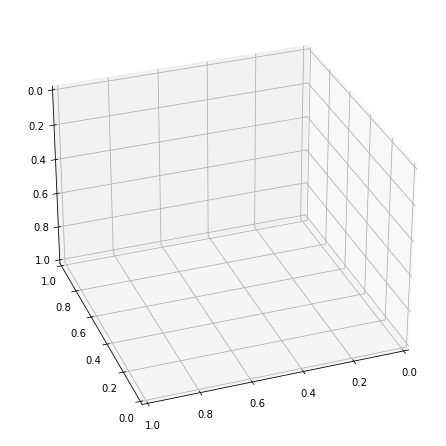

In [12]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = points
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 1")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [13]:
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
 
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]


In [14]:
medoids_initial = init_medoids(datapoints, 3)

In [15]:
def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided, 
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p

    return S

In [16]:
S = compute_d_p(datapoints, medoids_initial, 2)

In [17]:
def assign_labels(S):
    return np.argmin(S, axis=1)
  
labels = assign_labels(S)

def update_medoids(X, medoids, p):
    
    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)
        
    out_medoids = medoids
                
    for i in set(labels):
        
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))

        cluster_points = datapoints[labels == i]
        
        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity= np.sum(compute_d_p(datapoints, datap, p))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
    return out_medoids

In [18]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [19]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])
  
#Full algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids,labels)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]

In [21]:
def mark_matches(a, b, exact=False):
      assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1) | (a_int == 2)).all()
    assert ((b_int == 0) | (b_int == 1) | (b_int == 2)).all()
    
    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches

    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if (2*num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [23]:
def count_matches(a, b, exact=False):
     matches = mark_matches(a, b, exact=exact)
    return np.sum(matches)

n_matches = count_matches(labels, data['clusters'])
print(n_matches,
      "matches out of",
      len(data), "data points",
      "(~ {:.1f}%)".format(100.0 * n_matches / len(labels)))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)